In [4]:
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
# 导入波士顿房价数据集
dataset = load_boston()

# 随机划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=42)

# 特征工程：标准化数据，让数据符合正态分布，加速模型训练
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.fit_transform(x_test)

# 创建模型及优化器的实例，指定学习率为常数，初始学习率为0.01，最大迭代次数为10000
estimator = SGDRegressor(learning_rate="constant", eta0=0.01, max_iter=10000)

# 训练
estimator.fit(x_train, y_train)

# 输出模型参数w和b
print("模型权重w:", estimator.coef_, sep='\n')
print("模型偏置b:", estimator.intercept_, sep='\n')

# 使用测试集进行预测
y_predict = estimator.predict(x_test)

# 计算均方误差MSE，评估模型预测性能
error = mean_squared_error(y_test, y_predict)
print("均方误差MSE:", error, sep='\n')

# 计算R2分数，评估模型拟合性能
r2_score = estimator.score(x_test, y_test)
print("R2分数:", r2_score, sep='\n')


模型权重w:
[-1.30331906  0.82005995  0.17261145  1.06908948 -2.16863723  3.42778735
 -0.35583981 -3.04647316  2.06814056 -1.67270458 -2.01818115  1.33990063
 -3.99446577]
模型偏置b:
[22.93269574]
均方误差MSE:
30.748268206553764
R2分数:
0.560909290283879


D:\ProgramData\Anaconda3\envs\ml_old\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

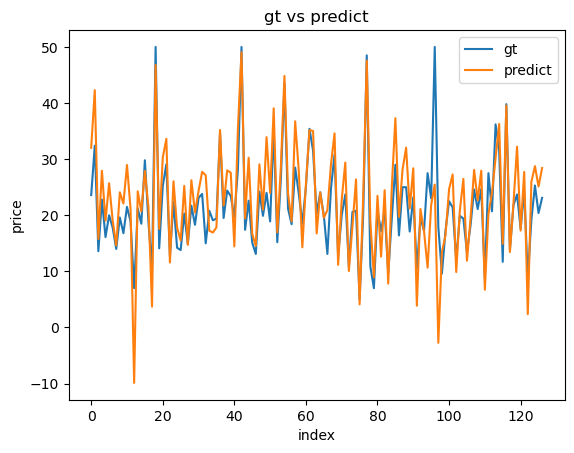

In [6]:
import matplotlib.pyplot as plt

# 绘制真实值和预测值曲线
plt.plot(y_test, label="gt")
plt.plot(y_predict, label="predict")
plt.xlabel("index")
plt.ylabel("price")
plt.legend(loc="best")
plt.title("gt vs predict")
plt.show()